In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [3]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import cv2

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [3]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_test.shape, y_test.shape)


Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

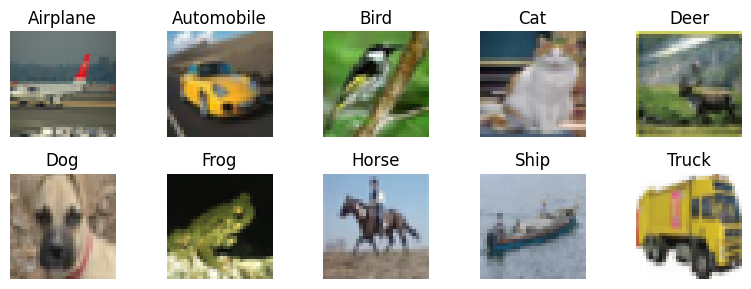

In [ ]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [4]:

##################################################
################### YOUR CODES ###################

# train_images = train_data.reshape((40000, 32*32*3))
# train_images = train_images / 255.
# test_images = x_test.reshape((10000, 32*32*3))
# test_images = test_images.astype("float32") / 255
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

##################################################

50000 train samples
10000 test samples


# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [5]:
##################################################
################### YOUR CODES ###################

##################################################
model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [6]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

In [7]:
hist = model.fit(x_train, y_train, epochs= 10, validation_data=(x_test,y_test ), batch_size=128)

Epoch 1/10
391/391 [==============================] - 17s 10ms/step - loss: 1.6864 - accuracy: 0.3901 - val_loss: 1.4243 - val_accuracy: 0.5023
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.3837 - accuracy: 0.5079 - val_loss: 1.2779 - val_accuracy: 0.5567
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2732 - accuracy: 0.5532 - val_loss: 1.1757 - val_accuracy: 0.5936
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1973 - accuracy: 0.5825 - val_loss: 1.1328 - val_accuracy: 0.6129
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 1.1435 - accuracy: 0.6008 - val_loss: 1.0605 - val_accuracy: 0.6392
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1036 - accuracy: 0.6167 - val_loss: 1.0198 - val_accuracy: 0.6502
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0690 - accuracy: 0.6295 - val_loss: 1.0222 - val_accuracy: 0.6528
Epoc

Train your model for `10 epochs` and proper `batch_size`.

This function plots the `loss` and `accuracy` of your model by the model's history.

In [14]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

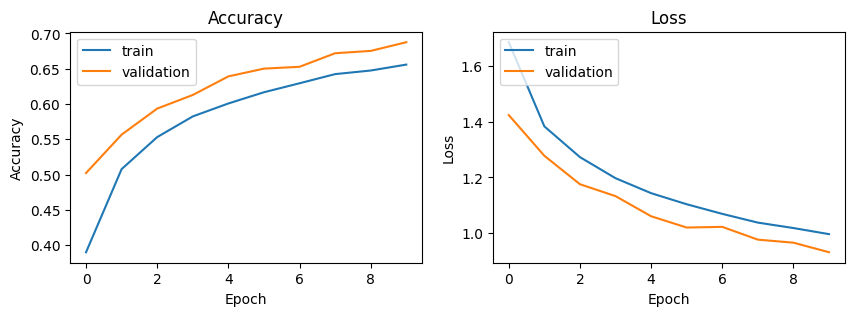

In [9]:
plot_acc_loss(hist)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [9]:
##################################################
################### YOUR CODES ###################
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
#grayscaled = tf.image.rgb_to_grayscale(image)

##################################################

In [11]:
def augment(image_label, seed):
  image, label = image_label
  image = tf.image.resize_with_crop_or_pad(image, 32 + 6, 32 + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[32, 32, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

In [12]:

model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        data_augmentation,
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)



In [13]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

In [14]:
##################################################
hist = model.fit(x_train, y_train, epochs= 10, validation_data=(x_test, y_test), batch_size=128)
##################################################

Epoch 1/10
391/391 [==============================] - 5s 9ms/step - loss: 1.9170 - accuracy: 0.2997 - val_loss: 1.7807 - val_accuracy: 0.3491
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.7440 - accuracy: 0.3698 - val_loss: 1.6017 - val_accuracy: 0.4306
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.6779 - accuracy: 0.3969 - val_loss: 1.6098 - val_accuracy: 0.4339
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 1.6333 - accuracy: 0.4134 - val_loss: 1.5104 - val_accuracy: 0.4582
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 1.6079 - accuracy: 0.4233 - val_loss: 1.4717 - val_accuracy: 0.4808
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 1.5739 - accuracy: 0.4362 - val_loss: 1.5061 - val_accuracy: 0.4645
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 1.5592 - accuracy: 0.4410 - val_loss: 1.4290 - val_accuracy: 0.5002
Epoc

Let's see your model performance with augmentation.

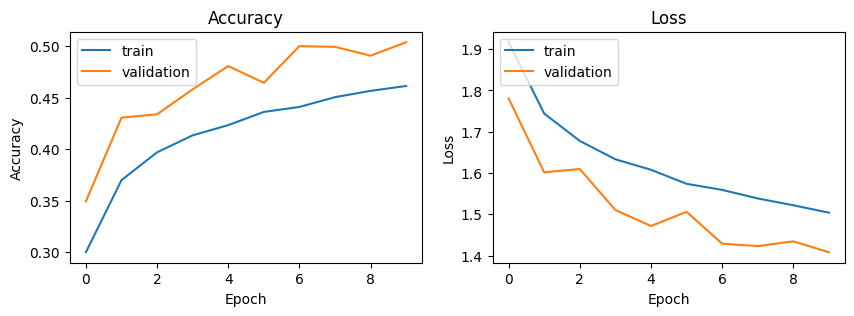

In [15]:
plot_acc_loss(hist)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

In [1]:
def preproccess(X,Y):
  X_p = keras.applications.resnet50.preprocess_input(X)
  Y_p = keras.utils.to_categorical(Y,  10)
  return X_p ,Y_p

In [17]:
def resize_image_arr(img_arr):
    x_resized_list = []
    for i in range(img_arr.shape[0]):
        img = img_arr[0]
        resized_img =cv2.resize(img, (224, 224),interpolation = cv2.INTER_LINEAR)
        x_resized_list.append(resized_img)
    return np.stack(x_resized_list)

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# print(x_train.shape)
# x_train = resize_image_arr(x_train)
# x_test = resize_image_arr(x_test)
# x_test = x_test.reshape(-1, 224, 224, 3)
x_train,y_train = preproccess(x_train,y_train)
x_test,y_test = preproccess(x_test,y_test)

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
input_t = keras.Input(shape = (224,224,3))
res_model = keras.applications.ResNet50(include_top = False , weights = "imagenet" , input_tensor = input_t)

94765736/94765736 [==============================] - 0s 0us/step


In [21]:
res_model.trainable = False

In [22]:
for i ,layer in enumerate(res_model.layers):
    print(i,layer.name , "-" , layer.trainable)

0 input_3 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [23]:
#define model
to_res = (224, 224)
modelp = keras.Sequential(
    [

        layers.Lambda(lambda image: tf.image.resize(image, to_res)),
        data_augmentation,
        res_model,
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

modelp.build((None ,224,224,3)) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
modelp.summary()

check_point = keras.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                      

In [25]:
modelp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
hist = modelp.fit(x_train, y_train, epochs= 10, validation_data=(x_test,y_test), batch_size=128)

Epoch 1/10
391/391 [==============================] - 217s 532ms/step - loss: 1.5364 - accuracy: 0.4855 - val_loss: 0.7249 - val_accuracy: 0.7485
Epoch 2/10
391/391 [==============================] - 209s 534ms/step - loss: 1.1453 - accuracy: 0.6103 - val_loss: 0.5930 - val_accuracy: 0.8077
Epoch 3/10
391/391 [==============================] - 208s 533ms/step - loss: 1.0334 - accuracy: 0.6501 - val_loss: 0.5478 - val_accuracy: 0.8239
Epoch 4/10
391/391 [==============================] - 208s 533ms/step - loss: 0.9720 - accuracy: 0.6724 - val_loss: 0.5059 - val_accuracy: 0.8406
Epoch 5/10
391/391 [==============================] - 208s 533ms/step - loss: 0.9370 - accuracy: 0.6879 - val_loss: 0.4761 - val_accuracy: 0.8423
Epoch 6/10
391/391 [==============================] - 208s 533ms/step - loss: 0.9084 - accuracy: 0.6981 - val_loss: 0.4637 - val_accuracy: 0.8460
Epoch 7/10
391/391 [==============================] - 208s 532ms/step - loss: 0.8935 - accuracy: 0.7032 - val_loss: 0.4866 -

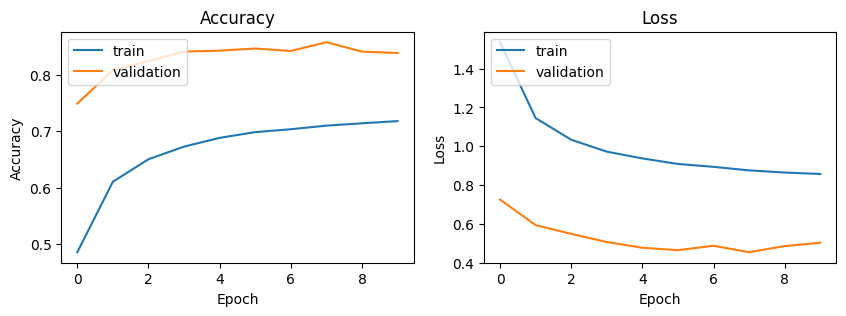

In [27]:
plot_acc_loss(hist)

## Resize input to 224 * 224 (`extra bonus`)

In [6]:
input_t = keras.Input(shape = (32,32,3))
res_model = keras.applications.ResNet50(include_top = False , weights = "imagenet" , input_tensor = input_t)
res_model.trainable = False

In [7]:
reslayers = []
for layer in res_model.layers[0:4]:
  layer.trainable = False
  reslayers.append(layer)

## Use only the first three blocks (`extra bonus`)

In [10]:
modelp = keras.Sequential(
    [

        reslayers[0],
        data_augmentation,
        reslayers[1] ,
        reslayers[2] ,
        reslayers[3],
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

modelp.build((None ,32,32,3)) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
modelp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)         0         
                                                                 
 conv1_conv (Conv2D)         (None, 16, 16, 64)        9472      
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 64)       256       
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                    

In [11]:
modelp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
hist = modelp.fit(x_train, y_train, epochs= 10, validation_data=(x_test,y_test), batch_size=128)

Epoch 1/10
391/391 [==============================] - 13s 8ms/step - loss: 2.1721 - accuracy: 0.2179 - val_loss: 1.9394 - val_accuracy: 0.2902
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.9843 - accuracy: 0.2801 - val_loss: 1.8711 - val_accuracy: 0.3218
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.9489 - accuracy: 0.2975 - val_loss: 1.8699 - val_accuracy: 0.3170
Epoch 4/10
391/391 [==============================] - 3s 6ms/step - loss: 1.9351 - accuracy: 0.3007 - val_loss: 1.8298 - val_accuracy: 0.3548
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 1.9304 - accuracy: 0.2975 - val_loss: 1.8258 - val_accuracy: 0.3370
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 1.9161 - accuracy: 0.3026 - val_loss: 1.8286 - val_accuracy: 0.3406
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 1.9170 - accuracy: 0.3055 - val_loss: 1.8309 - val_accuracy: 0.3467
Epoch

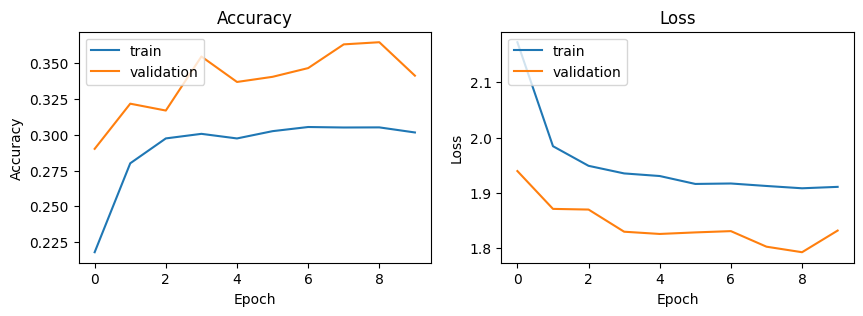

In [15]:
plot_acc_loss(hist)